In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("C:\\Users\\bhupal\\desktop\\Car details v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.drop(columns=["seller_type","max_power","torque"],inplace=True)

In [10]:
df

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Manual,First Owner,18.5 kmpl,1197 CC,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Manual,First Owner,19.3 kmpl,1248 CC,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Manual,First Owner,23.57 kmpl,1396 CC,5.0


In [11]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          221
engine           221
seats            221
dtype: int64

In [12]:
median=df.seats.median()

In [13]:
df.seats.fillna(median,inplace=True)

In [14]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          221
engine           221
seats              0
dtype: int64

In [15]:
df['engine']=df['engine'].str.split(' ').str.get(0)

In [16]:
df

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.0 kmpl,1396,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.1 kmpl,1298,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Manual,First Owner,18.5 kmpl,1197,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.8 kmpl,1493,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Manual,First Owner,19.3 kmpl,1248,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Manual,First Owner,23.57 kmpl,1396,5.0


In [17]:
median=df.engine.median()

In [18]:
df.engine.fillna(median,inplace=True)

In [19]:
df['mileage']=df['mileage'].str.split('k').str.get(0)

In [20]:
median=df.mileage.median()

In [21]:
df.mileage.fillna(median,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   object 
 8   engine         8128 non-null   object 
 9   seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 635.1+ KB


In [23]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
seats            0
dtype: int64

<Axes: ylabel='selling_price'>

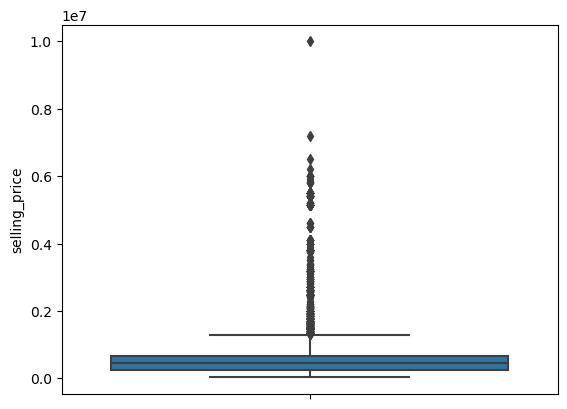

In [24]:
sns.boxplot(y="selling_price",data=df)

In [25]:
q1=df.selling_price.quantile(.25)
q3=df.selling_price.quantile(.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df=df[(df.selling_price<ul) & (df.selling_price>ll)]


In [26]:
ll,ul

(-375002.5, 1305001.5)

In [27]:
df

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4,1248,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.7,1497,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.0,1396,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.1,1298,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Manual,First Owner,18.5,1197,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.8,1493,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Manual,First Owner,19.3,1248,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Manual,First Owner,23.57,1396,5.0


In [28]:
q1=df.km_driven.quantile(.25)
q3=df.km_driven.quantile(.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df=df[(df.km_driven<ul) & (df.km_driven>ll)]

In [29]:
df

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4,1248,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.7,1497,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.0,1396,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.1,1298,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Manual,First Owner,18.5,1197,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.8,1493,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Manual,First Owner,19.3,1248,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Manual,First Owner,23.57,1396,5.0


In [30]:
len(df.name.unique())

1878

In [31]:
a=df.groupby("name")["name"].agg("count").sort_values(ascending=False)

In [32]:
a

name
Maruti Swift Dzire VDI         129
Maruti Alto 800 LXI             82
Maruti Alto LXi                 71
Maruti Swift VDI                60
Maruti Swift VDI BSIV           59
                              ... 
Mahindra Scorpio S7 120          1
Mahindra Scorpio SLE BS IV       1
Mahindra Scorpio SLX 4WD         1
Mahindra Scorpio SLX 4WD LE      1
Volvo V40 Cross Country D3       1
Name: name, Length: 1878, dtype: int64

In [33]:
l10=a[a<=10]

In [34]:
l10

name
Hyundai i20 Asta Option 1.4 CRDi    10
Mahindra TUV 300 mHAWK100 T8        10
Tata Safari DICOR 2.2 EX 4x2        10
Hyundai EON D Lite Plus             10
Maruti Alto LX BSIII                10
                                    ..
Mahindra Scorpio S7 120              1
Mahindra Scorpio SLE BS IV           1
Mahindra Scorpio SLX 4WD             1
Mahindra Scorpio SLX 4WD LE          1
Volvo V40 Cross Country D3           1
Name: name, Length: 1740, dtype: int64

In [35]:
df.name=df.name.apply(lambda x: 'other' if x in l10 else x)

C:\Users\bhupal\AppData\Local\Temp\ipykernel_7276\1975763297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name=df.name.apply(lambda x: 'other' if x in l10 else x)


In [36]:
df.drop(columns=["transmission","owner"],inplace=True)

C:\Users\bhupal\AppData\Local\Temp\ipykernel_7276\1711307362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["transmission","owner"],inplace=True)


In [37]:
df

,name,year,selling_price,km_driven,fuel,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,23.4,1248,5.0
1,other,2014,370000,120000,Diesel,21.14,1498,5.0
2,other,2006,158000,140000,Petrol,17.7,1497,5.0
3,other,2010,225000,127000,Diesel,23.0,1396,5.0
4,other,2007,130000,120000,Petrol,16.1,1298,5.0
...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,18.5,1197,5.0
8124,other,2007,135000,119000,Diesel,16.8,1493,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,19.3,1248,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,23.57,1396,5.0


In [38]:
df=pd.get_dummies(df,columns=['name','fuel'])

In [39]:
df

,year,selling_price,km_driven,mileage,engine,seats,name_Chevrolet Beat Diesel LT,name_Chevrolet Beat LT,name_Chevrolet Spark 1.0 LS,name_Chevrolet Spark 1.0 LT,...,name_Toyota Etios VX,name_Toyota Innova 2.5 G (Diesel) 8 Seater,name_Toyota Innova 2.5 VX (Diesel) 7 Seater,name_Volkswagen Polo Diesel Highline 1.2L,name_Volkswagen Vento Diesel Highline,name_other,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,23.4,1248,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014,370000,120000,21.14,1498,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2006,158000,140000,17.7,1497,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2010,225000,127000,23.0,1396,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2007,130000,120000,16.1,1298,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.5,1197,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8124,2007,135000,119000,16.8,1493,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8125,2009,382000,120000,19.3,1248,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8126,2013,290000,25000,23.57,1396,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


C:\Users\bhupal\AppData\Local\Temp\ipykernel_7276\3881769184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["km_driven"])


<Axes: xlabel='km_driven', ylabel='Density'>

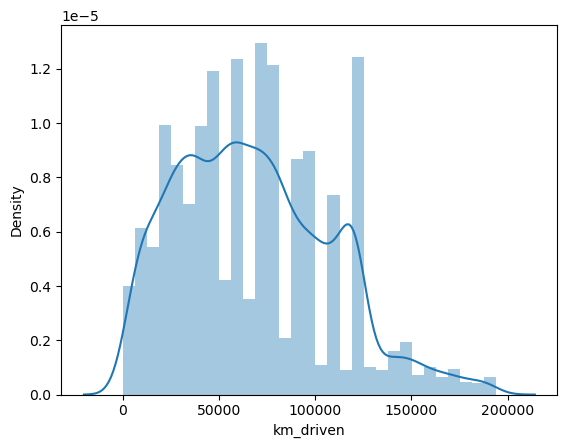

In [40]:
sns.distplot(df["km_driven"])

# log transform for km_driven

In [41]:
df["drive_log"]=np.log(df.km_driven)

C:\Users\bhupal\AppData\Local\Temp\ipykernel_7276\2029205815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["drive_log"])


<Axes: xlabel='drive_log', ylabel='Density'>

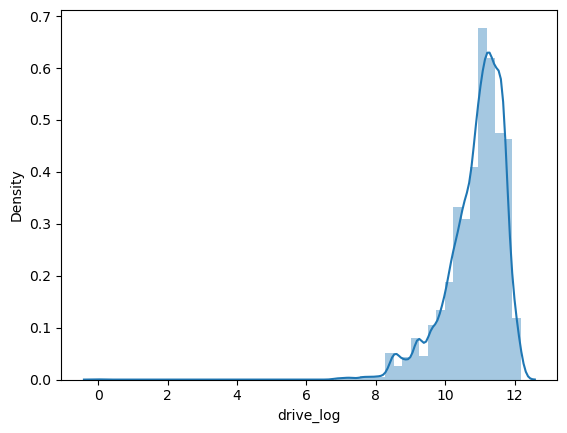

In [42]:
sns.distplot(df["drive_log"])

In [43]:
df["drive_recip"]=1/df.km_driven

C:\Users\bhupal\AppData\Local\Temp\ipykernel_7276\1425269309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["drive_recip"])


<Axes: xlabel='drive_recip', ylabel='Density'>

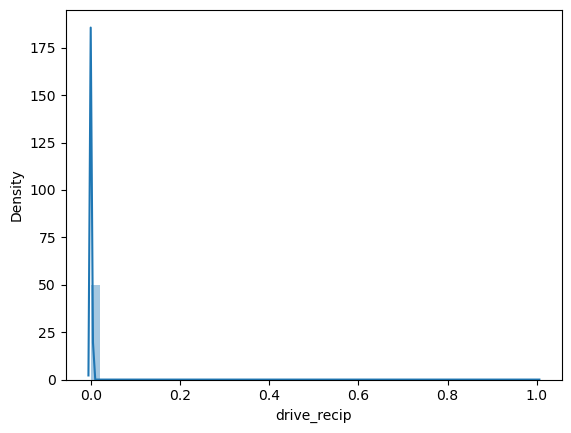

In [44]:
sns.distplot(df["drive_recip"])

In [5]:
#df["drive_boxcox"],parameters=stats.boxcox(df.km_driven)

In [6]:
#sns.distplot(df.drive_boxcox)

In [ ]:
df["drive_sqr"]=df.km_driven**.5

In [ ]:
sns.distplot(df.drive_sqr)

In [47]:
df

,year,selling_price,km_driven,mileage,engine,seats,name_Chevrolet Beat Diesel LT,name_Chevrolet Beat LT,name_Chevrolet Spark 1.0 LS,name_Chevrolet Spark 1.0 LT,...,name_Toyota Innova 2.5 VX (Diesel) 7 Seater,name_Volkswagen Polo Diesel Highline 1.2L,name_Volkswagen Vento Diesel Highline,name_other,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,drive_log,drive_recip
0,2014,450000,145500,23.4,1248,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,11.887931,0.000007
1,2014,370000,120000,21.14,1498,5.0,0,0,0,0,...,0,0,0,1,0,1,0,0,11.695247,0.000008
2,2006,158000,140000,17.7,1497,5.0,0,0,0,0,...,0,0,0,1,0,0,0,1,11.849398,0.000007
3,2010,225000,127000,23.0,1396,5.0,0,0,0,0,...,0,0,0,1,0,1,0,0,11.751942,0.000008
4,2007,130000,120000,16.1,1298,5.0,0,0,0,0,...,0,0,0,1,0,0,0,1,11.695247,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.5,1197,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,11.608236,0.000009
8124,2007,135000,119000,16.8,1493,5.0,0,0,0,0,...,0,0,0,1,0,1,0,0,11.686879,0.000008
8125,2009,382000,120000,19.3,1248,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,11.695247,0.000008
8126,2013,290000,25000,23.57,1396,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,10.126631,0.000040


In [48]:
df.drop(columns=["km_driven"],inplace=True)

In [49]:
df

,year,selling_price,mileage,engine,seats,name_Chevrolet Beat Diesel LT,name_Chevrolet Beat LT,name_Chevrolet Spark 1.0 LS,name_Chevrolet Spark 1.0 LT,name_Ford EcoSport 1.5 Diesel Titanium BSIV,...,name_Toyota Innova 2.5 VX (Diesel) 7 Seater,name_Volkswagen Polo Diesel Highline 1.2L,name_Volkswagen Vento Diesel Highline,name_other,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,drive_log,drive_recip
0,2014,450000,23.4,1248,5.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,11.887931,0.000007
1,2014,370000,21.14,1498,5.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,11.695247,0.000008
2,2006,158000,17.7,1497,5.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,11.849398,0.000007
3,2010,225000,23.0,1396,5.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,11.751942,0.000008
4,2007,130000,16.1,1298,5.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,11.695247,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,18.5,1197,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,11.608236,0.000009
8124,2007,135000,16.8,1493,5.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,11.686879,0.000008
8125,2009,382000,19.3,1248,5.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,11.695247,0.000008
8126,2013,290000,23.57,1396,5.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,10.126631,0.000040


In [50]:
x=df.drop(columns="selling_price",axis=1)
y=df.selling_price

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

In [53]:
dd=pd.DataFrame()
dd["y_test"]=y_test
dd["predicted"]=pred
dd["diffrence"]=y_test-pred

In [54]:
dd

,y_test,predicted,diffrence
3468,120000,144681.513428,-24681.513428
5806,375000,432269.974487,-57269.974487
5733,110000,26058.661987,83941.338013
3454,400000,388000.421387,11999.578613
7206,125000,29084.091187,95915.908813
...,...,...,...
5630,779000,779001.069580,-1.069580
590,700000,660166.811768,39833.188232
2322,250000,383646.483887,-133646.483887
5633,335000,407351.048584,-72351.048584


In [55]:
import math
import sklearn.metrics
mse =sklearn.metrics.mean_squared_error(y_test, pred)

In [56]:
mse


20434828492.298668

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.6942028711051244